Following the Qiskit textbook: https://qiskit.org/textbook/

@Mariana R. Barros

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Representing Multi-Qubit States 

$$|a⟩ = a_{00} |00⟩+ a_{01}|01⟩ + a_{10}|10⟩ + a_{11}|11⟩ =  \left\lceil 
\begin{matrix}
a_{00} \\
a_{01}\\
a_{10}\\
a_{11}
\end{matrix}
\right\rceil$$


$$p(|00⟩)=|⟨00|a⟩|^{2} = |a_{00}|^{2}$$

$$|a_{00}|ˆ{2}+ |a_{01}|ˆ{2} + |a_{01}|ˆ{2} + |a_{11}|ˆ{2} = 1$$

Yet, if 

$|a⟩ =  \left\lceil 
\begin{matrix}
a_{0} \\
a_{1}
\end{matrix}
\right\rceil$  and 
$|b⟩ =  \left\lceil 
\begin{matrix}
b_{0} \\
b_{1}
\end{matrix}
\right\rceil$, then 

$$|ba⟩ =  \left\lceil 
\begin{matrix}
b_{0} \times \left\lceil\begin{matrix}
a_{0} \\
a_{1}
\end{matrix}\right\rceil \\
b_{1} \times \left\lceil \begin{matrix}
a_{0} \\
a_{1}
\end{matrix} \right\rceil
\end{matrix}
\right\rceil = \left\lceil 
\begin{matrix}
b_{0}a_{0} \\
b_{0}a_{1}\\
b_{1}a_{0}\\
b_{1}a_{1}
\end{matrix}
\right\rceil $$

In [2]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

Each qubit is in the state  |+⟩ , so we should see the vector:

$$ |+++⟩ = \frac{1}{\sqrt(8)}\left\lceil 
\begin{matrix}
1 \\
1\\
1\\
1\\
1\\
1\\
1\\
1  
\end{matrix}
\right\rceil$$


In [3]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

#### Writting other states:

In [4]:
qc2 = QuantumCircuit(2)

qc2.h(0)
qc2.x(1)
# See the circuit:
qc2.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [5]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc2.save_statevector()
qobj2 = assemble(qc2)
final_state2 = svsim.run(qobj2).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state2, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

##  Single Qubit Gates on Multi-Qubit Statevectors

Just as we used the tensor product to calculate multi-qubit statevectors, we use the tensor product to calculate matrices that act on these statevectors.

We can represent the simultaneous operations (H & X) using their tensor product:

$$X |q_{1}⟩ \otimes H|q_{0}⟩ = (X \otimes H) |q_{1} q_{0}⟩  $$


Therefore, 

$$ X \otimes H = \left\lceil 
\begin{matrix}
0 & H \\
H & 0\\
\end{matrix}
\right\rceil$$


Instead of calculating this by hand, we can use Qiskit’s aer_simulator to calculate this for us. The unitary simulator multiplies all the gates in our circuit together to compile a single unitary matrix that performs the whole quantum circuit:

In [6]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [7]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

In [8]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

If we want to apply a gate to only one qubit at a time (such as in the circuit below), we describe this using tensor product with the identity matrix, e.g.:

$$X \otimes  I $$

In [9]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

In [10]:
# Simulate the unitary
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

# Multi-Qubit Gates 

## CNOT-Gate

In [11]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

We have seen how this acts on classical states, but let’s now see how it acts on a qubit in superposition. We will put one qubit in the state  
|+⟩ :

In [12]:
#Writting (and checking) the initial state |0+>:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)

# Let's see the result:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

In [13]:
#Now,applying h to the |0+> state:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [14]:
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

# Entangled States

We saw in the previous section we could create the state:

$$\frac{1}{\sqrt{2}} (|00⟩ + |11⟩)$$



This is known as a Bell state. We can see that this state has 50% probability of being measured in the state  |00⟩, and 50% chance of being measured in the state  |11⟩. Most interestingly, it has a 0% chance of being measured in the states  |01⟩ or |10⟩. 
 We can see this in Qiskit:

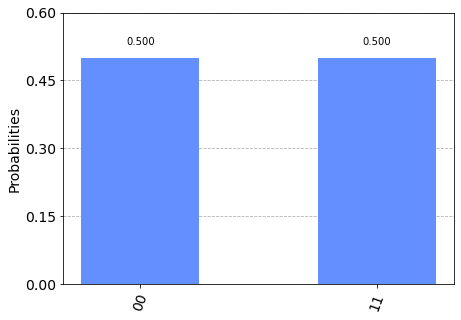

In [15]:
plot_histogram(result.get_counts())


### Visualizing Entangled States

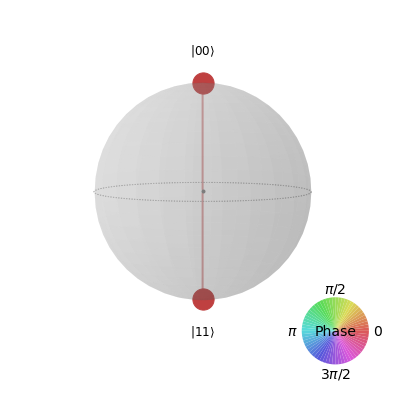

In [16]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)

Here we can clearly see the correlation between the qubits. The Q-sphere's shape has no significance, it is simply a nice way of arranging our blobs; the number of 0s in the state is proportional to the states position on the Z-axis, so here we can see the amplitude of  
|00⟩  is at the top pole of the sphere, and the amplitude of  |11⟩  is at the bottom pole of the sphere.

